## Step1: Reading and Understanding Data
---

In [1]:
# Load necessary libraries for data manipulation
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 37)

In [2]:
#loading dataset as df
df= pd.read_csv('Leads.csv')

#Chek for top 5 rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Inspect rows and columns in dataframe
df.shape

(9240, 37)

In [4]:
#Inspect column types and null values if present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- 37 columns with 30 categorical and 7 numerical features
- multiple columns with missing data

In [5]:
#Check for statistical summary of numeric features
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- Converted as target column has mean around 38.5%
- total visits, time spent and views per visit seems to have outliers present

In [6]:
#Check for duplicates
df.duplicated().sum()

0

No duplicate values in the dataset

In [7]:
#Check for ID columns
df['Prospect ID'].nunique()== len(df)

True

In [8]:
df['Lead Number'].nunique()== len(df)

True

In [9]:
#Dropping columns prospect_id, lead_number- identifiier columns with no impact on output
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace= True)

## Check for Missing Values

In [10]:
# Missing value percentage of each feature
round(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False) /df.shape[0]*100,2 )

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [11]:
#Drop columns with grater than 45% of values missing 
df.drop(['Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 
            'Asymmetrique Activity Index'], axis= 1, inplace= True)

In [12]:
#Inspect Tags feature
df.Tags.value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [13]:
# replace nan with missing category
df.Tags.replace({np.nan: 'not_specified'}, inplace= True)

In [14]:
#2% of overall data size
9240*0.02

184.8

In [15]:
#Merge less frequent buckets with 'Others' (< 185 i.e. 2%)
df.Tags.replace(['Recognition issue (DEC approval)', 'University not recognized', 'Shall take in the next coming month',
                'Lateral student', 'Interested in Next batch', 'In confusion whether part time or DLP',
                 'Want to take admission but has financial problems', 'Still Thinking', 'Lost to Others','in touch with EINS',
                'number not provided','opp hangup', 'wrong number given','Diploma holder (Not Eligible)',
                'invalid number', 'Graduation in progress', 'Interested  in full time MBA', 'Not doing further education',
                'Lost to EINS'], 'Others', inplace= True)


In [16]:
# Inspect Tags feature
df.Tags.value_counts(dropna= False, normalize= True)*100

not_specified                          36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Others                                  9.199134
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Name: Tags, dtype: float64

In [17]:
#Inspect Lead Profile Feature
df['Lead Profile'].value_counts(dropna= False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
#Replace select with missing 
df['Lead Profile'].replace('Select', np.nan, inplace= True)

In [19]:
#Check value counts post replacing
df['Lead Profile'].value_counts(dropna= False, normalize= True)

NaN                            0.741883
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: Lead Profile, dtype: float64

In [20]:
#drop Lead Profiel column as missing >74%
df.drop('Lead Profile', axis=1, inplace= True)

In [21]:
#Inspect 'What matters most to you in choosing a course'
df['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
#Replace nan's with mode
df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects', inplace= True)
df['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
#Drop column as there is only one prediminat value
df.drop('What matters most to you in choosing a course', axis= 1, inplace= True)

In [24]:
#Inspect What is your current occupation
df['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#Replace nan's with Unemployed
df['What is your current occupation'].replace(np.nan, 'not_specified', inplace= True)

In [26]:
# Inspect Country
df.Country.value_counts(dropna= False, normalize= True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [27]:
#Replac nan's with not_specified 
df.Country.replace(np.nan, 'not_specified', inplace= True)

In [28]:
#Replace all countries except India and nan to Others
cntry= df.Country.value_counts()[df.Country.value_counts(normalize=True)<.10].index
df.Country.replace(cntry, 'Others', inplace= True)
df.Country.value_counts(dropna= False)

India            6492
not_specified    2461
Others            287
Name: Country, dtype: int64

In [29]:
# Drop Country as India class is predominant
df.drop('Country', axis= 1, inplace= True)

In [30]:
# Inspect 'How did you hear about X Education'
df['How did you hear about X Education'].value_counts(dropna= False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
#Replace Select with nan
df['How did you hear about X Education'].replace('Select', np.nan, inplace= True)
df['How did you hear about X Education'].value_counts(dropna= False, normalize= True)

NaN                      0.784632
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: How did you hear about X Education, dtype: float64

In [32]:
#Droppign column as there are 78% values missing
df.drop('How did you hear about X Education', axis= 1, inplace= True)

In [33]:
# Inspect Specialization
df.Specialization.value_counts(dropna= False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
#probably Select and nan's are students
#Replace Select with nan's
df.Specialization.replace('Select', np.nan, inplace= True)
df.Specialization.value_counts(dropna= False, normalize= True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [35]:
#Replace nan's with not_specified
df.Specialization.replace(np.nan, 'not_specified', inplace= True)

In [36]:
#All Management specializations
val =df.Specialization[df.Specialization.str.find('Management')>0].unique()
val

array(['Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Human Resource Management',
       'Marketing Management', 'Operations Management',
       'Retail Management', 'Hospitality Management',
       'Healthcare Management'], dtype=object)

In [37]:
# Replace All management values to one management value
df.Specialization.replace(val, 'Mngmnt', inplace= True)

In [38]:
# Check final specialization distribution
df.Specialization.value_counts(dropna= False, normalize= True)

Mngmnt                               0.460281
not_specified                        0.365801
Business Administration              0.043615
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
E-COMMERCE                           0.012121
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [39]:
# Inspect City
df.City.value_counts(dropna= False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [40]:
#Replace Select with nan's 
df.City.replace('Select', np.nan, inplace= True)
df.City.value_counts(dropna= False, normalize =True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [41]:
#Replace nan's with not_specified
df.City.replace(np.nan, 'not_specified', inplace= True)

In [42]:
# Inspect Last Activity
df['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
#Replace nan's with not_specified
df['Last Activity'].replace(np.nan, 'missing', inplace= True)

In [44]:
#Replace less frequeny values with others
val= df['Last Activity'].value_counts()[df['Last Activity'].value_counts()<100].index
print (val)

df['Last Activity'].replace(val, 'Others', inplace= True)

Index(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
       'Approached upfront', 'View in browser link Clicked', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'],
      dtype='object')


In [45]:
#Check value count post changes
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
missing                       103
Name: Last Activity, dtype: int64

In [46]:
# Inspect Lead Source
df['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [47]:
#Replace google with Google
df['Lead Source'].replace('google', 'Google', inplace=True)

#Replace nan's with missing
df['Lead Source'].replace(np.nan, 'missing', inplace= True)

In [48]:
#Replace all other values with less than 10 values as others
val= df['Lead Source'].value_counts()[df['Lead Source'].value_counts() < 10].index
print (val)

df['Lead Source'].replace(val, 'Others', inplace= True)

Index(['bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM'],
      dtype='object')


<AxesSubplot:>

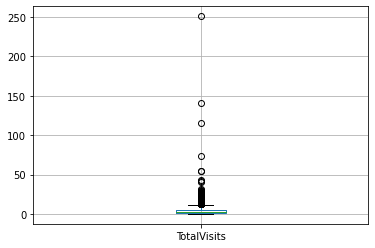

In [49]:
# Inspect TotalVisits - less than 2% values are missing
df[['TotalVisits']].boxplot()

In [50]:
#As ther are outliers present , replace nan's with median
df['TotalVisits'].fillna(df.TotalVisits.median(), inplace= True)

<AxesSubplot:>

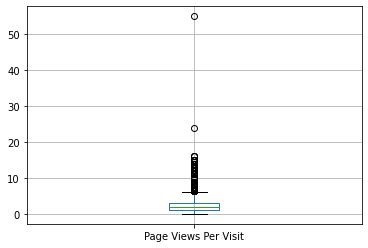

In [51]:
# Inspect Page Views Per Visit
df[['Page Views Per Visit']].boxplot()

In [52]:
#As there are outliers present, replacing nan's wiht median
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace= True)

In [53]:
#Check for missing values
df.isnull().sum().sum()

0

All missing values are cleaned!!!

## Check for Outliers

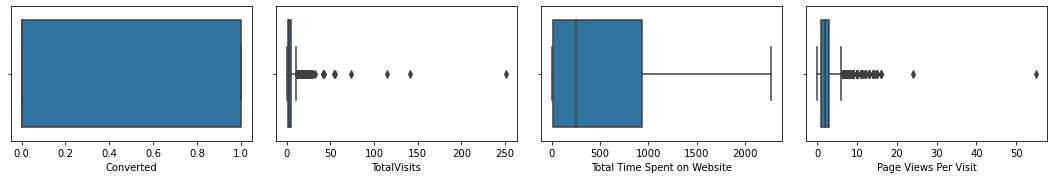

In [54]:
#Boxplots- to check for outliers in numberic features
pos=1
plt.figure(figsize= (15, 5))
for i in df.select_dtypes('number').columns:
    plt.subplot(2, 4, pos)
    sns.boxplot(df[i])
    pos+=1
plt.tight_layout(pad= 2)

Totla visits and Page views per visit seem to have outliers

In [55]:
#Inspect Total Visits
df.TotalVisits.quantile([.5, .75, .8, .9, .95, .99, 1])

0.50      3.0
0.75      5.0
0.80      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [56]:
#Removing bottom and upper 1% of values
Q3= df.TotalVisits.quantile(.99) 
Q1= df.TotalVisits.quantile(.01)
df= df [(df.TotalVisits>= Q1) & (df.TotalVisits<=Q3)]

In [57]:
#Inspect Page Views Per Visit
df['Page Views Per Visit'].quantile([.5, .75, .8, .9, .95, .99, 1])

0.50     2.0
0.75     3.0
0.80     4.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

Page_views_per_visit seems resolved after total_visits feature correction

In [58]:
#Check data shape after cleaning
df.shape

(9157, 26)

After Cleaning data has changed by 9240 -> 9157 rows and 37 columns -> 26 columns

### Check for Target Imbalance

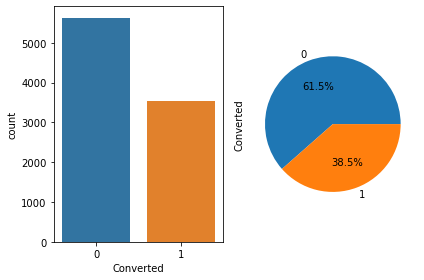

In [59]:
fig, ax= plt.subplots(1,2)
sns.countplot(df['Converted'], ax= ax[0])
df['Converted'].value_counts().plot.pie(autopct= '%1.1f%%',ax= ax[1])
plt.tight_layout()

38.5% leads are converted , looks good for modelling

## Step2: EDA
---

In [60]:
#Separating continous and caregorical columns for easy analysis
cont=[ i for i in df.select_dtypes('number').columns]
cat= [i for i in df.select_dtypes('object').columns]
print ('continous -->', cont)

continous --> ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [61]:
#Remove target variable
cont.remove('Converted')

In [62]:
print ('categorical -->', cat)

categorical --> ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


## Numeric Features

### Univariate Analysis

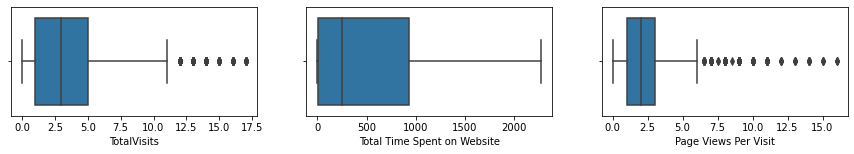

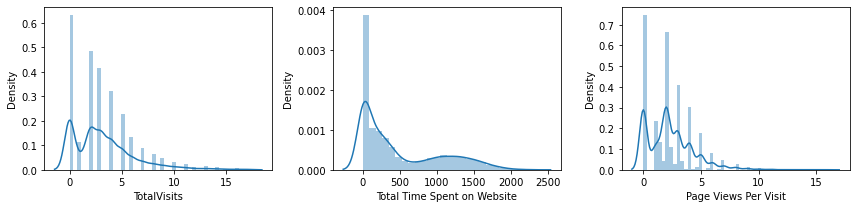

In [63]:
#Plot boxplot and histograms to understand distribution
pos=1
fig= plt.figure(figsize =(15, 2) )
for i in cont:
    ax= fig.add_subplot(1,3, pos)
    sns.boxplot(df[i], ax=ax)
    pos+=1
    
pos=1
fig= plt.figure(figsize =(12, 3) )
for i in cont:
    ax= fig.add_subplot(1,3, pos)
    sns.distplot(df[i], ax=ax)
    pos+=1
plt.tight_layout()

All three features are right skewed
- Total visits- majority leads visited for 0 to 5 times
- Total time spent- majority leads spent 0 to 500 units of time
- Page views- on an average 0 to 5 pages viewd per visit

### Bivariate Analysis

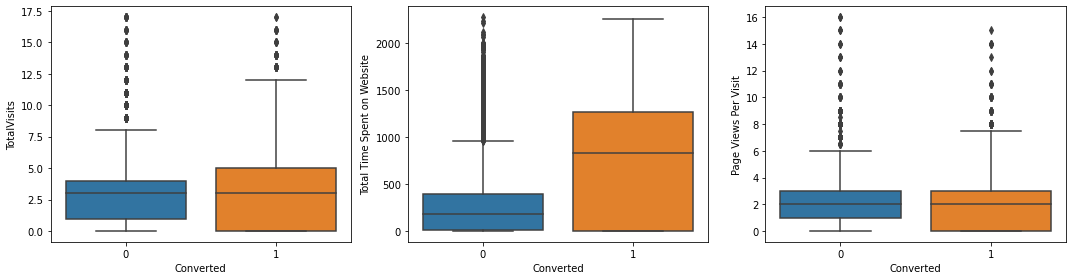

In [64]:
#Plot boxplot to understand distribution wrt Target column
pos=1
fig= plt.figure(figsize =(15, 4) )
for i in cont:
    ax= fig.add_subplot(1,3, pos)
    sns.boxplot(x= 'Converted', y= i, data=df, ax=ax)
    pos+=1
plt.tight_layout()

- Total visits- Medians are same for converted and not converted lead
- Total Time Spent on website- converted leads spend more time on website, website should have engaging content as it drives conversion
- Page views per visit- not significant for converted leads, same pattern between converted and not converted lead

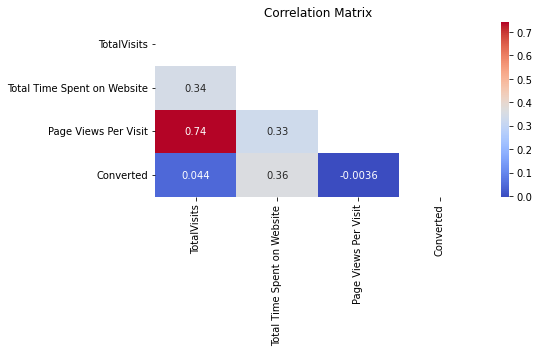

In [65]:
#Check correlation matrix between numerical attributes
col= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']

plt.figure(figsize= (8, 5))
mask= np.triu(df[col].corr())

sns.heatmap( df[col].corr() , annot= True, mask= mask, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()

- Time spent on website seems to have positve correlation with Conversion
- Page views per visit and totalvisits are strong positve correlated- may be redundant information

## Categorical Features

### Univariate Analysis

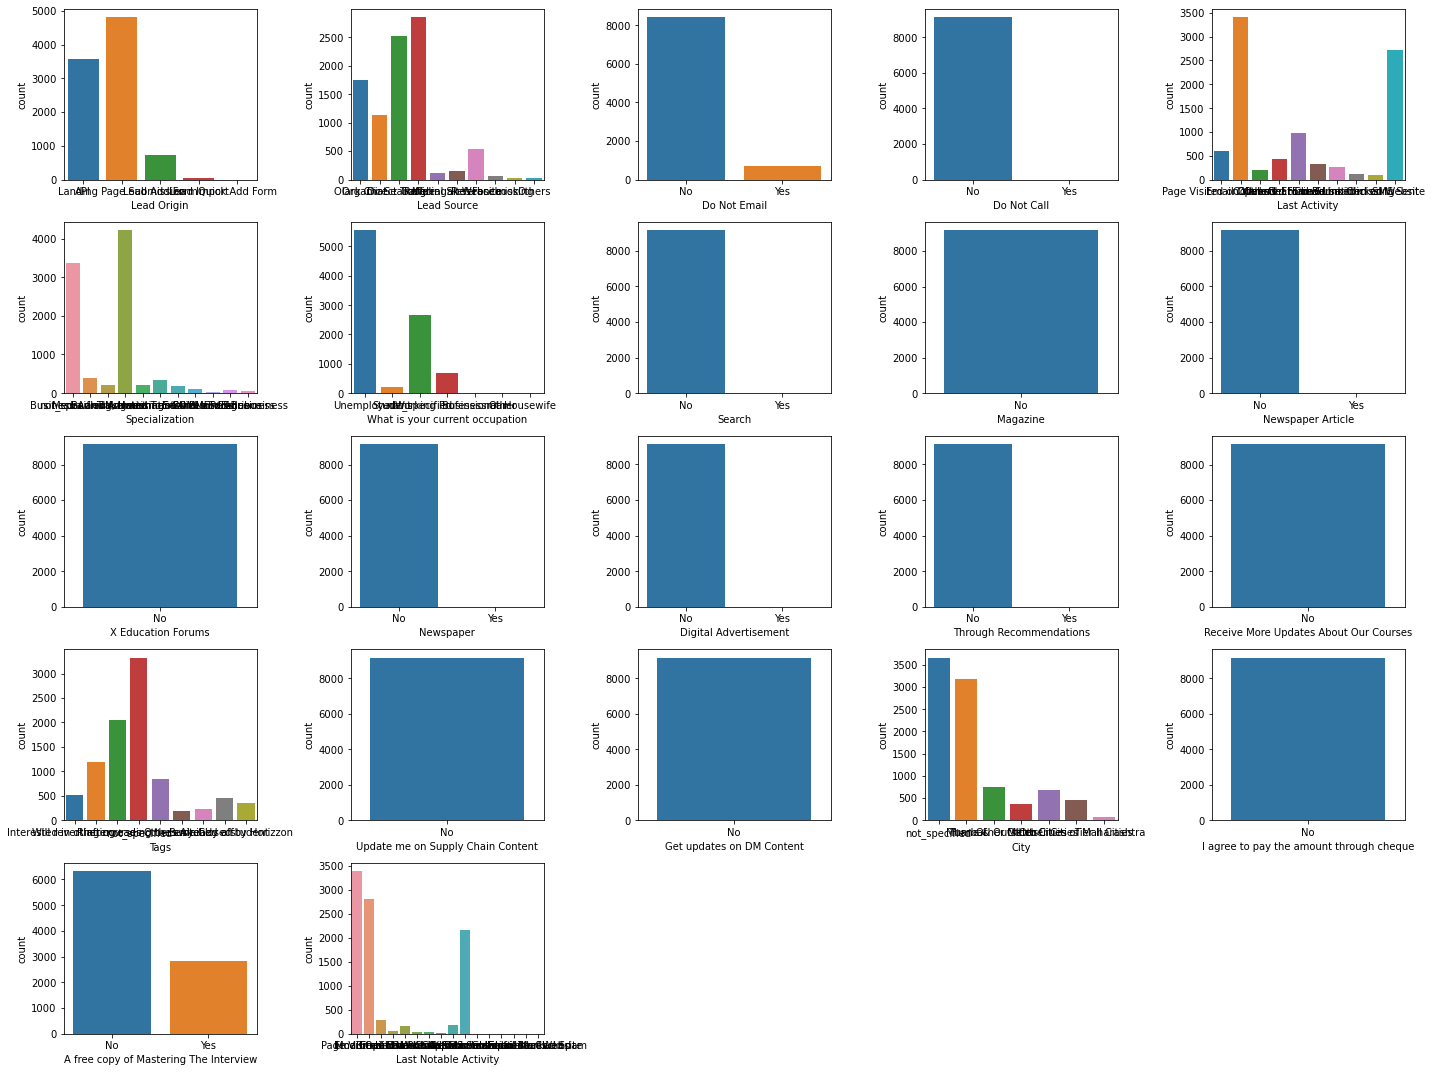

In [66]:
# Looking at countplot
pos=1
fig= plt.figure(figsize= (20, 15))
for i in cat:
    ax= fig.add_subplot(5, 5, pos)
    sns.countplot(df[i], ax= ax)
    pos+=1
fig.tight_layout()

**Deleting categorical features with majority single value as this will not help predict outcome!!!**

In [67]:
#Dropping columns with only one value or >90% of single valaue- does not contribute in predicting the outcome
col= ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
        'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Do Not Email']

df.drop(col, axis= 1, inplace= True)

In [68]:
#Removing dropped columns from cat varibale too
for i in col: cat.remove(i)

In [69]:
#Check for value counts for Last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3390
Email Opened                    2807
SMS Sent                        2159
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [70]:
#Replace less frequeny values with Others
val= df['Last Notable Activity'].value_counts()[df['Last Notable Activity'].value_counts()< 1000].index
print (val)

df['Last Notable Activity'].replace(val, 'Others', inplace= True)

Index(['Page Visited on Website', 'Olark Chat Conversation',
       'Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable',
       'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received'],
      dtype='object')


### Bivariate Analysis

In [71]:
#Handy function for bivariate analysis of categorical features
def plot(col):
    colors= ['#FF781F','#2D2926']
    fig, ax= plt.subplots(1, 2, figsize= (10, 5))
    
    s= sns.countplot(x= col, data=df, ax=ax[0], palette= colors)
    s.set_xticklabels(s.get_xticklabels(), rotation= 90)
    s.set_title(f'Countplot for {col}')
    s.set_xlabel('')

    s= sns.barplot(x= col, y= 'Converted', data=df, estimator= np.mean, ax=ax[1], ci= None, palette= colors)
    s.set_xticklabels(s.get_xticklabels(), rotation= 90)
    s.set_title(f'Conversion Rate for {col}')
    s.set_xlabel('')
    
    plt.tight_layout(pad= 4)    
    plt.show()

In [72]:
#Categorical features to be analyzed
print (cat)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


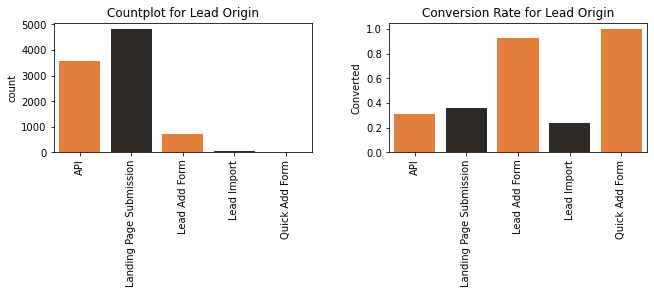

In [73]:
# plot Lead origin 
plot('Lead Origin')

- Landing Page submission, API has the highest amount of leads and average conversion
- Lead add form and Quick add form has the highest conversion but less leads
- So, Increase conversions in API and Landing page submission and increase Leads for Quick Add form Lead Add form

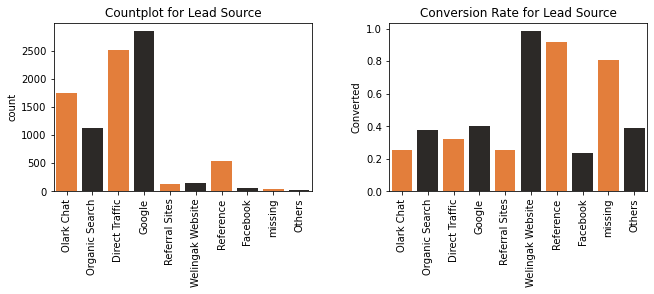

In [74]:
# Plot Lead Source
plot('Lead Source')

- Google and Direct Traffic generate most amount of leads but conversions are low
- Reference and Welingak website highest amount of conversions but lead volume is low
- So, increase conversion for Google, Direct traffic, Organic search, Olark chat leads and increase lead volumes for Reference and Welingak website

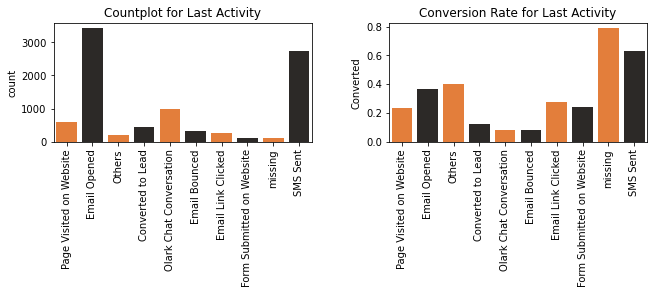

In [75]:
# Plot Last Activity
plot('Last Activity')

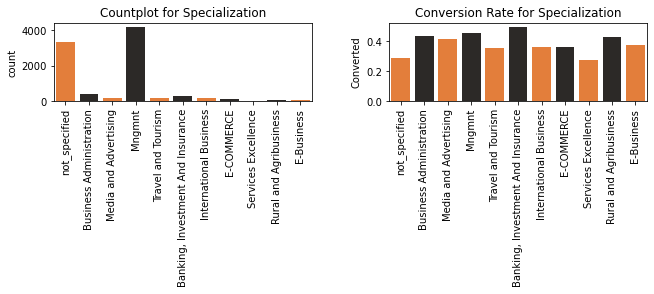

In [76]:
#Plot Specialization
plot('Specialization')

Most leads are for management specialization, and conversions do not change significantly across classes

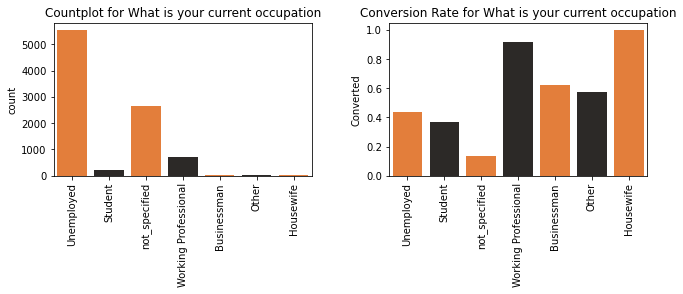

In [77]:
# Plot What is your current occupation
plot('What is your current occupation')

- Most leads are unempployed but have low conversions
- Working professionals and housewife have highest conversions but less amount of leads
- So, we should try improve conversions for unemployed and get more leads for Working professional/ Housewife buckets

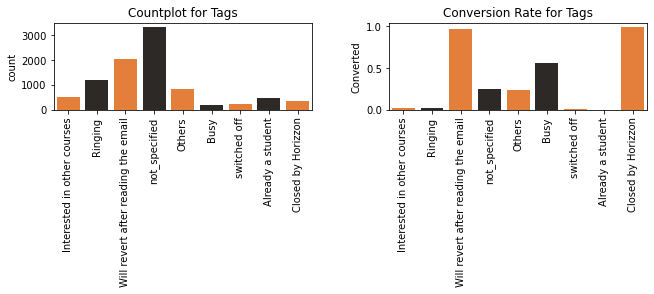

In [78]:
# Plot Tags
plot('Tags')

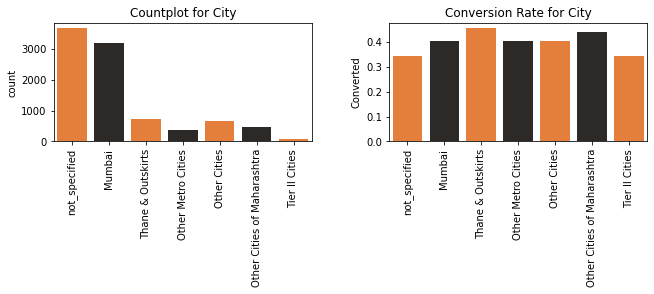

In [79]:
#Plot City
plot('City')

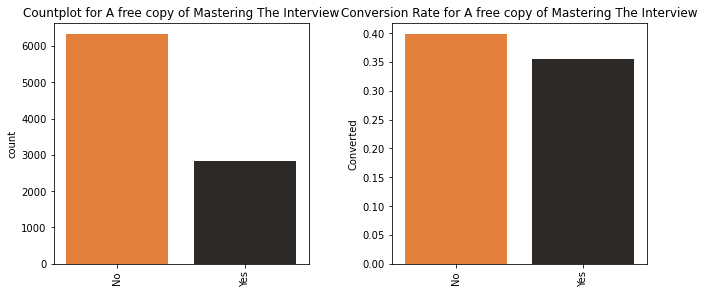

In [80]:
#Plot A free copy of Mastering The Interview
plot('A free copy of Mastering The Interview')

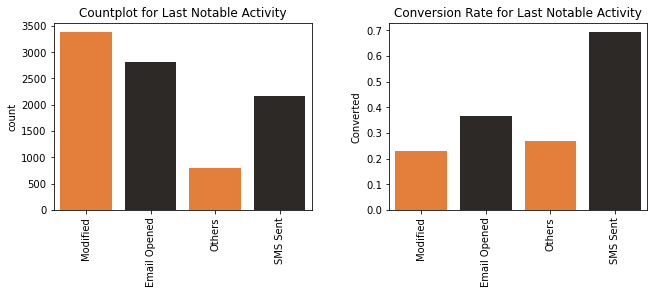

In [81]:
# Plot Last Notable Activity
plot('Last Notable Activity')

In [82]:
#final dataset
df.shape

(9157, 13)

We have reduced dataset from 36 features to 13 feartures, and rows from 9240 to 9157

## Step3: Preparing data for Modelling (feature Engineering)
---

In [83]:
# replacing Yes or No binary values to 0's and 1's
df['A free copy of Mastering The Interview'].replace({'Yes':1, 'No':0}, inplace= True)

### Dummy variable creation for features with more than two values

In [84]:
# Lead origin- dummy variable creation
df= pd.get_dummies(data= df, columns= ['Lead Origin'], drop_first= True)

In [85]:
col= ['Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
        'Tags', 'City', 'Last Notable Activity']

#Create dummy feaures for all remaining features, and drop selected features
df= pd.get_dummies(data= df, columns= col)

In [86]:
#Drop features to avoid dummy trap
drop_cols= ['Lead Source_missing', 'Last Activity_missing', 'Specialization_not_specified',
           'What is your current occupation_not_specified',
           'Tags_not_specified', 'City_not_specified','Last Notable Activity_Others']

df.drop(drop_cols, axis= 1, inplace= True)

In [87]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


### Train and Test Split

In [88]:
#Split data into 70% training set and 30% test set
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df, train_size= 0.7, random_state= 100)

print(df_train.shape, df_test.shape)

(6409, 60) (2748, 60)


In [89]:
#Getting Target column out
y_train= df_train.pop('Converted')
X_train= df_train

y_test= df_test.pop('Converted')
X_test= df_test

### Standardize Numeric features

In [90]:
col= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

#Scaling training data
X_train[col]= sc.fit_transform(X_train[col])

#Scaling test data
X_test[col]= sc.transform(X_test[col])

In [91]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,...,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
6490,-0.744597,-0.831303,-0.647913,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4026,-0.069711,-0.578290,-0.405762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6453,2.967279,-0.130933,1.773595,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8949,0.942619,-0.594791,-0.405762,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
6467,2.629836,-0.767133,4.195103,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


## Step4: Model Building
---

### Using RFE to get 20 most significant features

In [92]:
#Import Logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

#Import RFE module from sklearn to shortlist 20 most significant features
from sklearn.feature_selection import RFE
rfe= RFE(lr, n_features_to_select= 20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [93]:
#RFE ranking given to each feature
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key= lambda x: x[-1])

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Travel and Tourism', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Tags_Already a student', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Others', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', False, 2),
 ('Lead Source_Reference', False, 3),
 ('Last Notable A

In [94]:
#Selected features
col= [ i for i in X_train.columns[rfe.support_] ]
print (col)

['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Last Notable Activity_SMS Sent']


In [95]:
#Not Selected features
ns= [ i for i in X_train.columns[~rfe.support_] ]
print (ns)

['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked', 'Last Activity_Form Submitted on Website', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_International Business', 'Specialization_Media and Advertising', 'Specialization_Mngmnt', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'What is your current occupation_Businessman', 'What is your current occupation_Housewife', 'What is your current occupatio

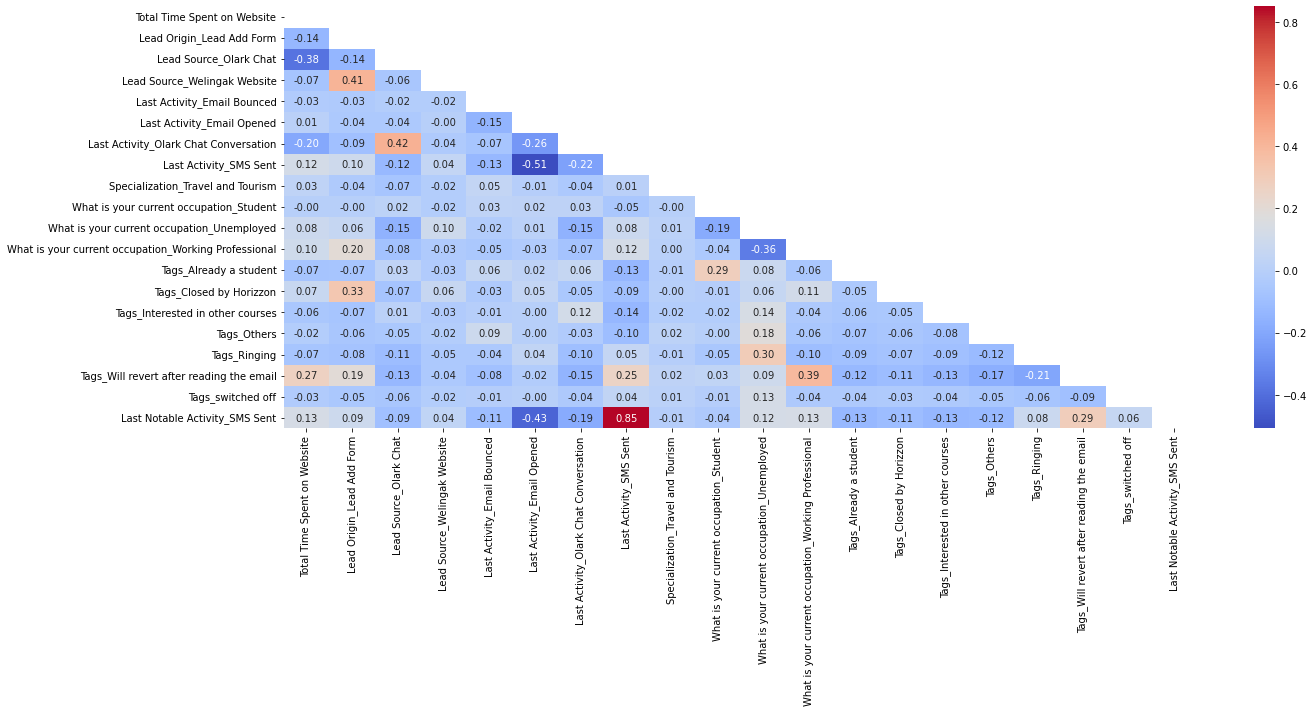

In [96]:
#Correlation between selected featues
plt.figure(figsize= (20, 10))
mask= np.triu(X_train[col].corr())

sns.heatmap(X_train[col].corr(), mask=mask, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.tight_layout()

Among shortlisted fearures by RFE, there exist correlation:
- Last Activity_SMS sent and Last Notable Activity_SMS Sent seem to have high positive correlation
- Last Activity_Email opened and Last Activity_SMS sent has negative correlation

In [97]:
#Helper function for fine tuning selected features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix

#function for modelling
def stats_model(col):
    lr= sm.GLM( y_train, sm.add_constant(X_train[col]), family= sm.families.Binomial() ).fit()
    print (lr.summary())
    y_train_pred= lr.predict(sm.add_constant(X_train[col]))
    y_train_pred= y_train_pred.apply(lambda x: 1 if x>0.5 else 0)
    print ('accuracy\n',accuracy_score(y_train, y_train_pred))
    print ('confusion matrix\n',confusion_matrix(y_train, y_train_pred))
    
#function to check multicollinearity
def vif(col):
    vif= pd.DataFrame()
    vif['features']= X_train[col].columns
    vif['VIF']= [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1]) ]
    print ('\n----VIFs-----\n',vif.sort_values(by= 'VIF', ascending= False) )

### Model1

In [98]:
#With all features selected by RFE
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'Last Activity_SMS Sent', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 
      'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional',
      'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Others', 
      'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1370.5
Date:                Sun, 22 Jan 2023   Deviance:                       2741.1
Time:                        16:30:12   Pearson chi2:                 8.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model2

In [99]:
#Remove What is your occupation_Unemployed as VIF>5
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'Last Activity_SMS Sent', 'Specialization_Travel and Tourism', 'What is your current occupation_Student', 
      'What is your current occupation_Working Professional', 'Tags_Already a student', 'Tags_Closed by Horizzon', 
      'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1479.2
Date:                Sun, 22 Jan 2023   Deviance:                       2958.4
Time:                        16:30:12   Pearson chi2:                 8.99e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model3

In [100]:
# Remove What is your current occupation_Student as has high p-value
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
      'What is your current occupation_Working Professional', 'Tags_Already a student', 'Tags_Closed by Horizzon', 
      'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1479.2
Date:                Sun, 22 Jan 2023   Deviance:                       2958.5
Time:                        16:30:13   Pearson chi2:                 8.99e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model4

In [101]:
# Remove Specialization_Travel and Tourism  as has high p-value
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'Last Activity_SMS Sent','What is your current occupation_Working Professional', 'Tags_Already a student', 
      'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing',
      'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6391
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1481.1
Date:                Sun, 22 Jan 2023   Deviance:                       2962.3
Time:                        16:30:13   Pearson chi2:                 9.03e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model5

In [102]:
# Remove Last Activity_SMS Sent  as VIF> 5
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'What is your current occupation_Working Professional', 'Tags_Already a student', 
      'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing',
      'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1491.7
Date:                Sun, 22 Jan 2023   Deviance:                       2983.3
Time:                        16:30:13   Pearson chi2:                 8.89e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model6

In [103]:
# Remove Tags_Others as P-value >5%
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'What is your current occupation_Working Professional', 'Tags_Already a student', 
      'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Ringing',
      'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.1
Date:                Sun, 22 Jan 2023   Deviance:                       2986.2
Time:                        16:30:13   Pearson chi2:                 8.84e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

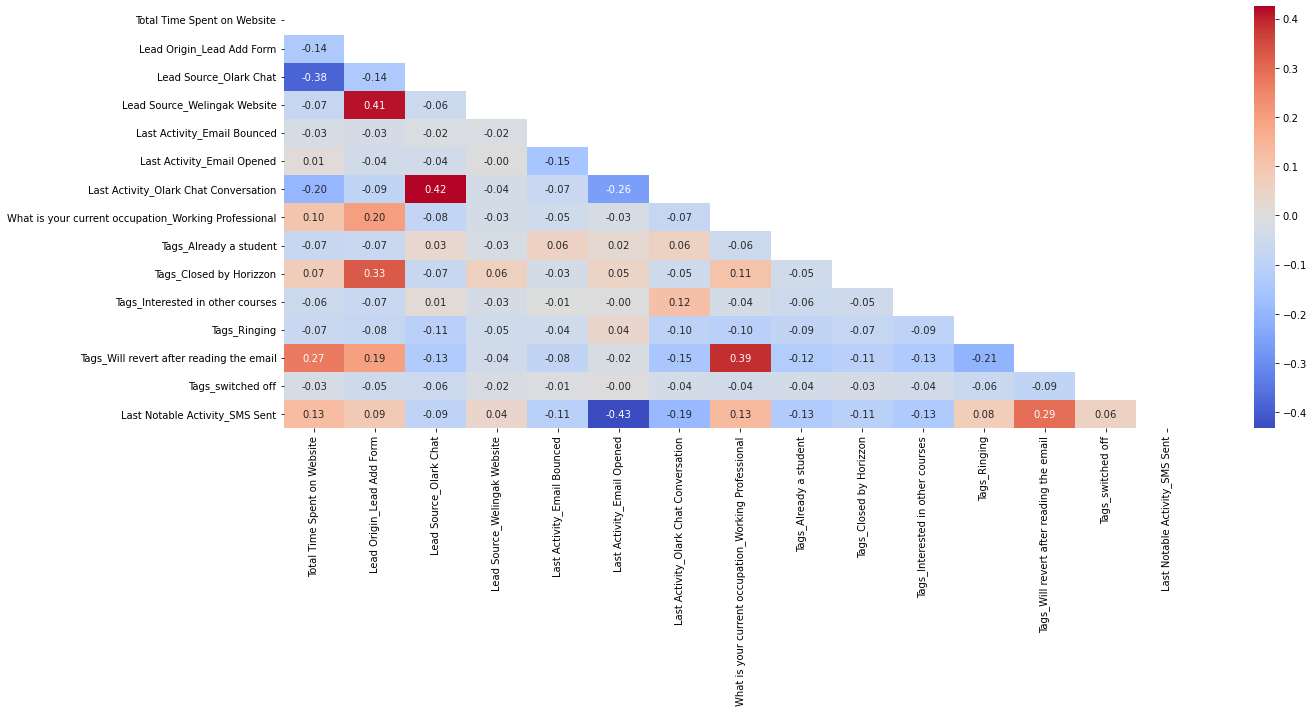

In [104]:
#Check Correlation between features
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 
      'What is your current occupation_Working Professional', 'Tags_Already a student', 
      'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Ringing',
      'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

plt.figure(figsize= (20, 10))
mask= np.triu(X_train[col].corr())

sns.heatmap(X_train[col].corr(), mask=mask, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.tight_layout()

### Model7

In [105]:
# Remove  'Last Activity_Olark Chat Conversation' as there is high correlation
col= ['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 
      'What is your current occupation_Working Professional', 'Tags_Already a student', 
      'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Ringing',
      'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.3
Date:                Sun, 22 Jan 2023   Deviance:                       3016.6
Time:                        16:30:14   Pearson chi2:                 9.10e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model8

In [106]:
# Remove  'Lead Origin_Lead Add Form' as there is high correlation
col= ['Total Time Spent on Website', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
      'Last Activity_Email Bounced', 'Last Activity_Email Opened', 
      'What is your current occupation_Working Professional', 'Tags_Already a student', 
      'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Ringing',
      'Tags_Will revert after reading the email',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1529.7
Date:                Sun, 22 Jan 2023   Deviance:                       3059.3
Time:                        16:30:14   Pearson chi2:                 8.78e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model9

In [107]:
# Remove Last Activity_Email Bounced and Add Lead Source_Reference
col= ['Total Time Spent on Website', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'What is your current occupation_Working Professional', 
      'Tags_Already a student',  'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 
      'Tags_Ringing','Tags_Will revert after reading the email', 'Lead Source_Reference',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

stats_model(col)
vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1522.2
Date:                Sun, 22 Jan 2023   Deviance:                       3044.5
Time:                        16:30:14   Pearson chi2:                 8.30e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Since, all p-values are within 5% and vif< 5 , we can use this model to make predictions on Train Data**

Obtained 90.8% accuracy with current model

## Step5: Model Evaluation and Prediction
---

In [108]:
#Predicting train data using model
col= ['Total Time Spent on Website', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'What is your current occupation_Working Professional', 
      'Tags_Already a student',  'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 
      'Tags_Ringing','Tags_Will revert after reading the email', 'Lead Source_Reference',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

lr= sm.GLM( y_train, sm.add_constant(X_train[col]), family= sm.families.Binomial() ).fit()

y_train_pred= lr.predict(sm.add_constant(X_train[col]) )

In [109]:
#Creating DataFrame for actuals vs probabilities
y_train_pred_final= pd.DataFrame({'Converted':y_train, 'Converted_prob': y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
6490,0,0.000999
4026,1,0.447219
6453,1,0.565503
8949,1,0.857579
6467,0,0.018606


In [110]:
#Saving indices of leads
y_train_pred_final.reset_index(inplace= True)

In [111]:
#Predicting results at 0.5 cut-off
y_train_pred_final['Converted_pred']= y_train_pred_final.Converted_prob.apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,index,Converted,Converted_prob,Converted_pred
0,6490,0,0.000999,0
1,4026,1,0.447219,0
2,6453,1,0.565503,1
3,8949,1,0.857579,1
4,6467,0,0.018606,0


In [112]:
#calculate accuracy score and look at confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

print ('Overall accuracy\n', accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_pred))
print()
print ('confusion_matrix\n', confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred))

Overall accuracy
 0.9077859260415041

confusion_matrix
 [[3735  194]
 [ 397 2083]]


### ROC Curve

In [113]:
#Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score

#Roc curve by the model
fpr, tpr, threshold= roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate= False)
#Area under curve
auc= roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

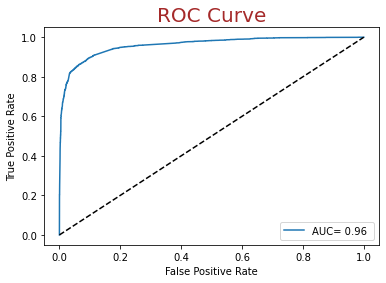

In [114]:
#Plot ROC Curve
plt.plot(fpr, tpr, label= 'AUC= %.2f '%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', color= 'brown', fontsize= 20)
plt.legend()
plt.show()

**Area under the curve is 96% indicating we have a good model!!**

### Tuning cut-off value
We had chosen 0.5 as cut-off point but clearly we can choose between different values to get the best performance

### Sensitivity and Specificity method

In [115]:
#Prepare DataFrame for Predictions at different cut-offs
n= [i/10 for i in range(10)]

for i in n:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.apply(lambda x: 1 if x>i else 0)
    
y_train_pred_final.head()

,index,Converted,Converted_prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,6490,0,0.000999,0,1,0,0,0,0,0,0,0,0,0
1,4026,1,0.447219,0,1,1,1,1,1,0,0,0,0,0
2,6453,1,0.565503,1,1,1,1,1,1,1,0,0,0,0
3,8949,1,0.857579,1,1,1,1,1,1,1,1,1,1,0
4,6467,0,0.018606,0,1,0,0,0,0,0,0,0,0,0


In [116]:
#Calculate accuracy, Sensitivity and Specificity for each cutoff predictions

n= [i/10 for i in range(10)]
cut_off= pd.DataFrame(columns= ['cutoff', 'accuracy', 'sensitivity', 'specificity'])

for i in n:
    cm= confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total= sum(sum(cm))
    
    acc= (cm[0,0]+cm[1, 1])/total
    sen= cm[1,1]/(cm[1,0]+cm[1,1])
    spec= cm[0,0]/(cm[0,0]+cm[0,1])
    
    cut_off.loc[i]= [i,acc, sen, spec]
    
print(cut_off)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.386956     1.000000     0.000000
0.1     0.1  0.754408     0.969758     0.618478
0.2     0.2  0.871587     0.937500     0.829982
0.3     0.3  0.899984     0.891532     0.905319
0.4     0.4  0.904197     0.869355     0.926190
0.5     0.5  0.907786     0.839919     0.950624
0.6     0.6  0.908722     0.820565     0.964368
0.7     0.7  0.895772     0.768548     0.976075
0.8     0.8  0.886254     0.735484     0.981420
0.9     0.9  0.864565     0.666129     0.989819


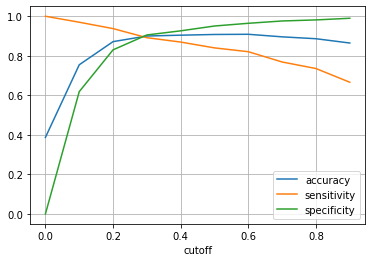

In [117]:
#Plot to visualize for ideal cut-off
cut_off.plot.line(x= 'cutoff', y= ['accuracy', 'sensitivity', 'specificity'])
plt.grid()
plt.legend()

**Choosing 0.3 as optimal cutoff**

### Precision and Recall Method

In [118]:
#Import module from sklearn
from sklearn.metrics import precision_recall_curve

p,r, threshold= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

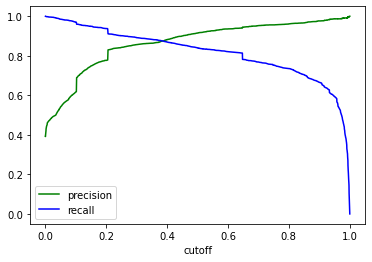

In [119]:
#Plot graph to visualize optimal cut off
plt.plot(threshold, p[:-1], color= 'g', label= 'precision')
plt.plot(threshold, r[:-1], color= 'b', label= 'recall')

plt.xlabel('cutoff')
plt.legend()

Precision-recall gives a 0.4 cutoff balance, but we will be chosing 0.3 as it has better sensitivity( 0.3(89%) &0.4(87%) )

Chosing cutoff depends on the business outcome, here we want to capture as many conversions as possible

In [120]:
#Using 0.3 as optimal cutoff 
y_train_pred_final['Final_pred']= y_train_pred_final.Converted_prob.apply(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,index,Converted,Converted_prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_pred
0,6490,0,0.000999,0,1,0,0,0,0,0,0,0,0,0,0
1,4026,1,0.447219,0,1,1,1,1,1,0,0,0,0,0,1
2,6453,1,0.565503,1,1,1,1,1,1,1,0,0,0,0,1
3,8949,1,0.857579,1,1,1,1,1,1,1,1,1,1,0,1
4,6467,0,0.018606,0,1,0,0,0,0,0,0,0,0,0,0


In [121]:
#Check accuracy
print ('accuracy\n',accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_pred))

accuracy
 0.8999843969418005


In [122]:
#Check Sensitivity and Specificity
cm= confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_pred)
print ('sensitivity\n',  cm[1,1]/(cm[1,0]+cm[1,1]))
print ('specificity\n',  cm[0,0]/(cm[0,0]+cm[0,1]))

sensitivity
 0.8915322580645161
specificity
 0.9053194196996691


In [123]:
#Calculating Precision and Recall Scores
from sklearn.metrics import precision_score, recall_score

print ('precision\n', precision_score(y_train_pred_final.Converted,y_train_pred_final.Final_pred) )
print ('recall\n', recall_score(y_train_pred_final.Converted,y_train_pred_final.Final_pred) ) 

precision
 0.8559814169570267
recall
 0.8915322580645161


### Lead Score on Train Data Predictions

In [124]:
# Calculating lead score based on probabilities
y_train_pred_final['Lead_score']= y_train_pred_final.Converted_prob.apply(lambda x: round(x*100))
y_train_pred_final.head()

,index,Converted,Converted_prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_pred,Lead_score
0,6490,0,0.000999,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4026,1,0.447219,0,1,1,1,1,1,0,0,0,0,0,1,45
2,6453,1,0.565503,1,1,1,1,1,1,1,0,0,0,0,1,57
3,8949,1,0.857579,1,1,1,1,1,1,1,1,1,1,0,1,86
4,6467,0,0.018606,0,1,0,0,0,0,0,0,0,0,0,0,2


## Prediction on Test Set

In [125]:
#Features used to build model
col= ['Total Time Spent on Website', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'What is your current occupation_Working Professional', 
      'Tags_Already a student',  'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 
      'Tags_Ringing','Tags_Will revert after reading the email', 'Lead Source_Reference',
      'Tags_switched off', 'Last Notable Activity_SMS Sent']

#predicting results for test set
y_test_pred= lr.predict( sm.add_constant(X_test[col]) )

y_test_pred_final= pd.DataFrame({'Converted':y_test, 'Converted_prob': y_test_pred})
y_test_pred_final.head()

,Converted,Converted_prob
7359,0,0.545298
2201,0,0.002784
2473,1,0.998946
8388,0,0.002773
2949,0,0.000704


In [126]:
#Use 0.3 cutoff as optimal cutoff
y_test_pred_final['Final_pred']= y_test_pred_final.Converted_prob.apply(lambda x: 1 if x> 0.3 else 0)
y_test_pred_final.head()

,Converted,Converted_prob,Final_pred
7359,0,0.545298,1
2201,0,0.002784,0
2473,1,0.998946,1
8388,0,0.002773,0
2949,0,0.000704,0


In [127]:
#Check accuracy
print ('accuracy\n',accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_pred))

accuracy
 0.903566229985444


In [128]:
# Calculate Sensitivity and Specificity
cm= confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_pred)
print ('sensitivity\n',  cm[1,1]/(cm[1,0]+cm[1,1]))
print ('specificity\n',  cm[0,0]/(cm[0,0]+cm[0,1]))

sensitivity
 0.9004784688995215
specificity
 0.9054609512624779


In [129]:
#Calculate Precision and Recall Score(Recall = Sensitivity)
print ('precision\n', precision_score(y_test_pred_final.Converted,y_test_pred_final.Final_pred) )
print ('recall\n', recall_score(y_test_pred_final.Converted,y_test_pred_final.Final_pred) ) 

precision
 0.8539019963702359
recall
 0.9004784688995215


|**Model Perf. on Train data**|**Model Perf. on Test Data**|
|--------|---|
|Accuracy- 90%|Accuracy- 90.3% |
|Sensitivity- 89.2%|Sensitivity- 90%|
|Specificity- 90.5%|Specificity- 90.5%| 
|Precision 85.6%|Precision 85.4%|

**Model seems to hold on Test data and has generalized well. Metrics are pretty good and can be used to increase conversions!!**

### Lead Score on Test data Predictions

In [130]:
### Lead Score on Test Data Predictions to prioritise on leads
y_test_pred_final['Lead_score']= y_test_pred_final.Converted_prob.apply(lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Converted_prob,Final_pred,Lead_score
7359,0,0.545298,1,55
2201,0,0.002784,0,0
2473,1,0.998946,1,100
8388,0,0.002773,0,0
2949,0,0.000704,0,0


## Step6: Interpreting Results
---

### Cumulative Accuracy Profile

In [131]:
#For Test set get 1's and total count
one_cnt= np.sum(y_test)
total_cnt= len(y_test)

#get x and y-axis for model
lm= [y for _, y in sorted(zip(y_test_pred, y_test), reverse= True)]
x= np.arange(0, total_cnt+1)
y= np.append([0], np.cumsum(lm))

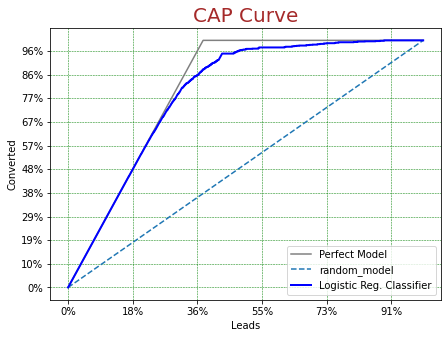

In [132]:
#Plot CAP Profile
plt.figure(figsize= (7, 5))
#Ideal Model
plt.plot([0, one_cnt, total_cnt], [0, one_cnt, one_cnt], c= 'grey', label= 'Perfect Model')
#Random Model at 38% conversion rate
plt.plot([0, total_cnt], [0, one_cnt], '--', label= 'random_model')
#Performance from Logistic classifier built 
plt.plot(x, y, c= 'b', label= 'Logistic Reg. Classifier', lw= 2)

#For changing x-axis and y-axis ticks
import matplotlib.ticker as mtick

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('CAP Curve', fontsize= 20, color= 'brown')
plt.yticks(np.arange(min(y), max(y)+1, 100.0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=one_cnt))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_cnt))
plt.xlabel('Leads')
plt.ylabel('Converted')
plt.legend(loc= 'lower right')
plt.show()

- Classifier built is close to Perfect Model, and of course much better than randomness
- Model can clearly capture 96% of conversions by just attempting on 55% of leads
- We can deploy model and monitor CAP curve to see how model performs over time

### Significant variables to predict potential Lead are-
- Tags (closed by horizon, interested in other courses, ringing, will revert after reading email, switched off, already a student)
- Lead Source (Welingak website, Reference, Olark Chat)
- Last Notable Activity (SMS Sent)
- What is your current occupation (working prefessional)
- Last Activity (Email Opened)
- Total Time Spent on Website

**Equation of Log Odds:-**

$ln(P/ (1-P)) = -2.37 +1.06* Total Time Spent on Website + 1.15* Lead Source_Olark Chat +5.7* Lead Source_Welingak Website +0.82* Last Activity_Email Opened +0.89* What is your current occupation_Working Professional- 3.65* Tags_Already a student +5.77* Tags_Closed by Horizzon -2.81* Tags_Interested in other courses -3.55* Tags_Ringing +3.99* Tags_Will revert after reading the email +1.63* Lead Source_Reference -4.36* Tags_switched off +2.78* Last Notable Activity_SMS Sent$

**Management should focus on:**
- Aggressive follow up on leads tagged Will revert after reading the email
- Target leads from Welingak website and Reference Lead Sources
- As X-Education offers professional courses- target leads who marked themselves as working professionals
- Target leads that have last notable activity as SMS Sent, and leads that spend more time on website
- Avoid leads with student’s tag- maybe they do not have paying capacity (early stage) 
- Avoid leads tagged- Interested in other courses/ Switched off/ Ringing